In [1]:
#연습문제 7-3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
%matplotlib inline
import pandas as pd
df = pd.read_csv('C:/gskim/P4DS/data/ex73.csv')
df.columns=["amit","toeic","gpa","rank"]

In [2]:
affair_mod =sm.Logit.from_formula("amit ~ toeic + gpa + rank", df).fit()

Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6


In [3]:
print(affair_mod.summary())
print(np.exp(affair_mod.params))
print(affair_mod.pred_table())

                           Logit Regression Results                           
Dep. Variable:                   amit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                 0.08107
Time:                        21:21:41   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4495      1.133     -3.045      0.002      -5.670      -1.229
toeic          0.0023      0.001      2.101      0.036       0.000       0.004
gpa            0.7770      0.327      2.373      0.0

In [5]:
from sklearn import model_selection
from sklearn import metrics

# Model selection using Logistic Regression analysis
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# Data Frame
X=df[['toeic','gpa', 'rank']]
Y=df[['amit']]

# Model fitness
clf.fit(X, Y)

# Forecasting depend on model
y_pred = clf.predict(X)

# Model Identification 
print("{} Result of Classification : \n{}\n".format(clf,metrics.classification_report(Y, y_pred)))
print("Accuracy:\n{}".format(metrics.accuracy_score(Y, y_pred)))
print("Confusion matrix:\n{}".format(metrics.confusion_matrix(Y, y_pred)))
print("ROC_AUC:\n{}".format(metrics.roc_auc_score(Y, y_pred)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Result of Classification : 
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       273
           1       0.61      0.22      0.32       127

    accuracy                           0.71       400
   macro avg       0.66      0.58      0.57       400
weighted avg       0.68      0.71      0.66       400


Accuracy:
0.7075
Confusion matrix:
[[255  18]
 [ 99  28]]
ROC_AUC:
0.577269187505408


C:\Users\gskim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9340659340659341 0.7795275590551181


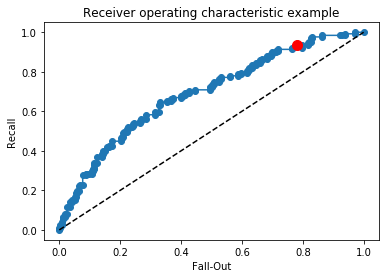

In [6]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
recall = 255 / (255 + 18)
fallout = 99 / (99 + 28)
print(recall, fallout)
fpr, tpr, thresholds = roc_curve(Y, clf.decision_function(X))
fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y, clf.predict_proba(X)[:, 1])
fpr, tpr, thresholds
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

In [9]:
#연습문제 7-4-1
import numpy as np
import pandas as pd

df = pd.read_csv('C:/gskim/P4DS/data/diabetes.csv')
df.info()
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

df[['Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
    df[['Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
df.fillna(df.mean(), inplace = True)   # replace NaN with the mean

print(df.eq(0).sum())


from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics

#---features---
X = df[['Glucose','BMI','Age']]

#---label---
Y = df.iloc[:,8]

affair_mod =sm.Logit.from_formula("y ~ X", df).fit()
print(affair_mod.summary())
print(np.exp(affair_mod.params))

# Model selection using Logistic Regression analysis
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# Model fitness
clf.fit(X, Y)

# Forecasting depend on model
y_pred = clf.predict(X)

# Model Identification 
print("{} Result of Classification : \n{}\n".format(clf,metrics.classification_report(Y, y_pred)))
print("Accuracy:\n{}".format(metrics.accuracy_score(Y, y_pred)))
print("Confusion matrix:\n{}".format(metrics.confusion_matrix(Y, y_pred)))
print("ROC_AUC:\n{}".format(metrics.roc_auc_score(Y, y_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age               

0.878 0.43283582089552236


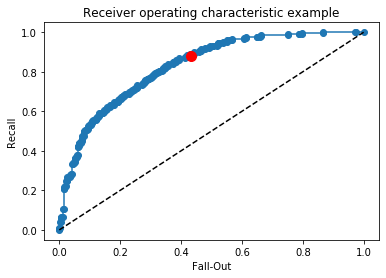

In [10]:
#연습문제 7-4-2
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
recall = 439 / (439 + 61)
fallout = 116 / (116 + 152)
print(recall, fallout)
fpr, tpr, thresholds = roc_curve(Y, clf.decision_function(X))
fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y, clf.predict_proba(X)[:, 1])
fpr, tpr, thresholds
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()